# Data Odyssey: Supervised and Unsupervised
![title](images/ml_types.jpg)

1. [Supervised Odyssey: Supervised Classification](#supervised)
    * [Packing up: Environment Setup](#prep)
    * [Data Exploration](#explore1)
    * [Data Classification: Logistic Regression](#logreg)
      + [Intuition](#intuition1)
      + [Coding with sklearn](#coding1)
    * [Result Visualization](#viz1)
2. [Unsupervised Odyssey: Unsupervised Classification](#unsupervised)
    * [Data Exploration](#explore1)
    * [Image Compression: K-Means](#k_means)
      + [Intuition](#intuition2)
      + [Coding with sklearn](#coding2)
    * [Result Visualization](#viz2)
3. [End of journey](#end)

##  Supervised Odyssey: Supervised Classification <a name="supervised"></a>

###  Packing up: Environment Setup <a name="prep"></a>

In [ ]:
# Install the necessary python packages
!conda install jupyter
!pip install sklearn
!pip install matplotlib
!pip install pandas

In [1]:
# import machine learning library
from sklearn.linear_model import LogisticRegression

In [2]:
# import data visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt
import numpy as np

### Data Exploration <a name="explore1"></a>

In [3]:
# load the data from the file
data = np.loadtxt('data/data.txt', delimiter=',')

# number of training data
n = data.shape[0] #YOUR CODE HERE
print('Number of training data=',n)

Number of training data= 100


In [4]:
# more details
print(data[:10,:])
print(data.shape)
print(data.dtype)

n = data.shape[0]
X = np.ones([n,3]) 
X[:,1:3] = data[:,0:2]
print(X.shape)
print(X[:5,:])

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]
 [61.10666454 96.51142588  1.        ]
 [75.02474557 46.55401354  1.        ]
 [76.0987867  87.42056972  1.        ]
 [84.43281996 43.53339331  1.        ]]
(100, 3)
float64
(100, 3)
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]


2-dimensional feature, exam grade1 and exam grade2 <br>
The label is 1 if a student is admitted; the lable is 0 if a student is rejecte. 

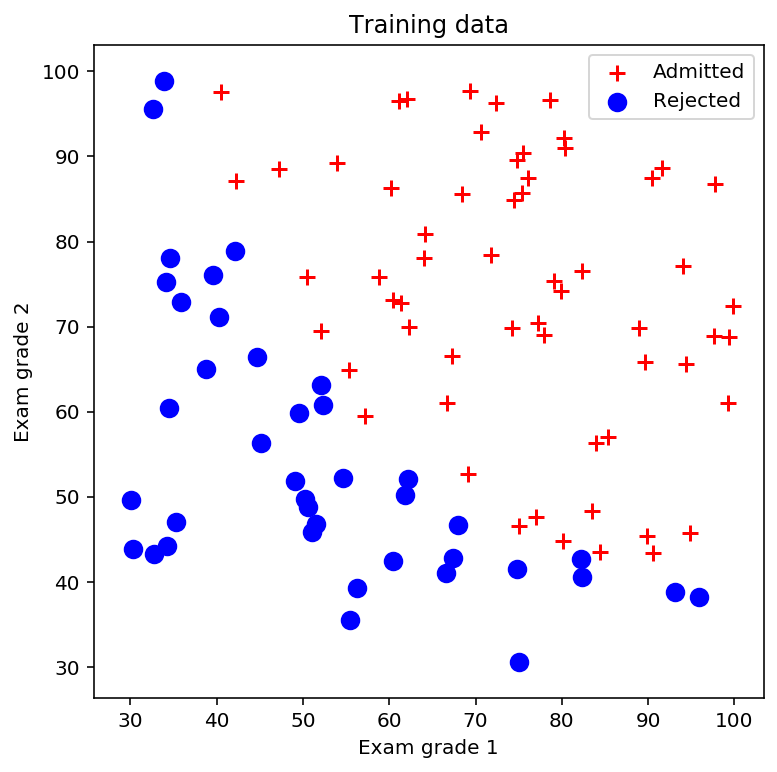

In [5]:
# Plot all data
x1 = data[:,0] # exam grade 1
x2 = data[:,1] # exam grade 2
idx_admit = (data[:,2]==1) # index of students who were admitted
idx_rejec = (data[:,2]==0) # index of students who were rejected

plt.figure(1,figsize=(6,6))
plt.scatter(x1[idx_admit], x2[idx_admit], s=60, c='r', marker='+', linewidths=2, label='Admitted') #YOUR CODE HERE
plt.scatter(x1[idx_rejec], x2[idx_rejec], s=60, c='b', marker='o', linewidths=2, label='Rejected') #YOUR CODE HERE
plt.title('Training data')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend()
plt.show()

## Data Classification: Logistic Regression <a name="logreg"></a>

### Algorithm Intuition ([online demo](https://www.desmos.com/calculator/naf1qogfjn))<a name="intuition1"></a>

![title](images/logreg.png)

### Coding with sklearn <a name="coding1"></a>

In [6]:
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z)) #YOUR CODE HERE
    return sigmoid_f 

def f_pred(X,w): 
    p = sigmoid(X.dot(w)) #YOUR CODE HERE
    return p

## Logistic regression/classification predictive function 
<hr>
$$
\begin{aligned}
p_w(x) &= \sigma(w_0 + w_1 x_{(1)} + w_2 x_{(2)})\\
&= \sigma(X w)
\end{aligned}
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2
\end{array} 
\right]
\quad
\Rightarrow 
\quad
p_w(x) = \sigma(X w)  =
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
$$

In [19]:
logreg_sklearn = LogisticRegression(C=1e6) # scikit-learn logistic regression
logreg_sklearn.fit(data[:,0:2], data[:,2]) # learn the model parameters #YOUR CODE HERE

w_sklearn = np.zeros([3,1])

w_sklearn[0,0] = logreg_sklearn.intercept_
w_sklearn[1:3,0] = logreg_sklearn.coef_

print(logreg_sklearn.intercept_)
print(logreg_sklearn.coef_)
print(w_sklearn)

[-24.95527834]
[[0.20458394 0.19980387]]
[[-24.95527834]
 [  0.20458394]
 [  0.19980387]]


/anaconda3/envs/data_odyssey/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Result Visualization <a name="viz1"></a>

[[3.07846723e-06]
 [4.11948941e-06]
 [5.51254431e-06]
 ...
 [9.99999561e-01]
 [9.99999672e-01]
 [9.99999755e-01]]


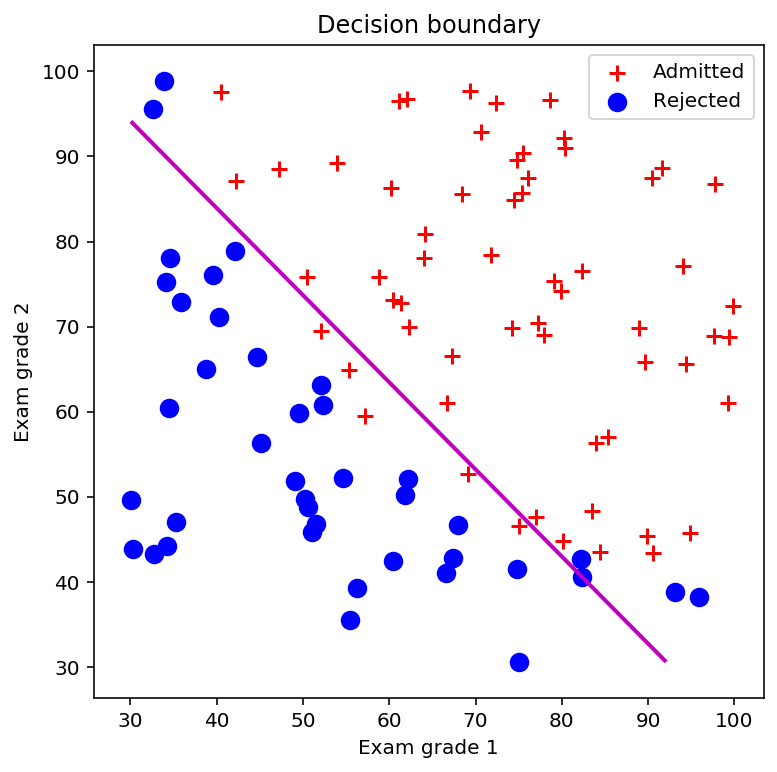

In [8]:
# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_admit], x2[idx_admit], s=60, c='r', marker='+', linewidths=2, label='Admitted') #YOUR CODE HERE
plt.scatter(x1[idx_rejec], x2[idx_rejec], s=60, c='b', marker='o', linewidths=2, label='Rejected') #YOUR CODE HERE
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')

x1_min, x1_max = X[:,1].min(), X[:,1].max() # grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w_sklearn)
print(p)
p = p.reshape(xx1.shape)
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='m');

plt.title('Decision boundary')
plt.legend()
plt.show()

In [9]:
# Predict probability of admission 
y_pred = f_pred(np.array([1,45,85]),w_sklearn)
print('Probability of admission is',y_pred[0]) #YOUR CODE HERE

Probability of admission is 0.7745751547682079


## Unsupervided Odyssey: Unsupervised Classification <a name="unsupervised"></a>

In [10]:
# Used with matplotlib.image to read images in jpg format
!pip install Pillow

In [11]:
# Image read module
from matplotlib.image import imread
from sklearn.cluster import KMeans

%matplotlib inline
plt.style.use('fivethirtyeight')

## Data Exploration <a name="explore2"></a>

In [12]:
# Read the image
from matplotlib.image import imread
img = imread('data/cat.jpg')
img_size = img.shape

In [13]:
print(img_size)

(700, 1000, 3)


## Image Compression: K-Means <a name="k_means"></a>

### Algorithm Intuition ([Online Demo](http://alekseynp.com/viz/k-means.html))<a name="intuition2"></a>

![title](images/k_means.png)

### Coding with sklearn <a name="coding2"></a>

In [14]:
# Reshape it to be 2-dimension
X = img.reshape(img_size[0]*img_size[1],img_size[2])

# Run the Kmeans algorithm
km = KMeans(n_clusters=20)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
# Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

In [16]:
print(X_compressed.shape)

(700000, 3)


## Data Visualization <a name="viz2"></a>

In [17]:
# Reshape X_recovered to have the same dimension as the original image
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

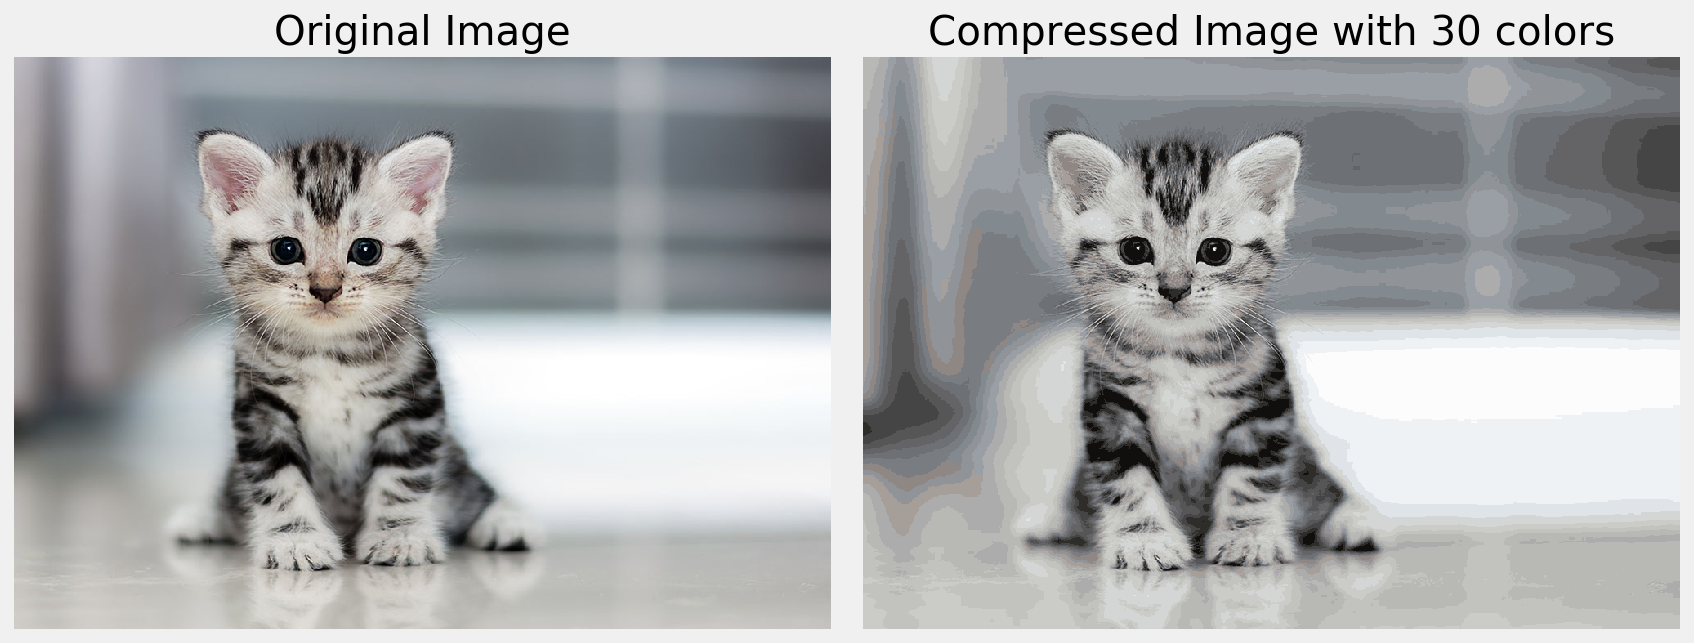

In [18]:
# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

## End of Journey <a name="end"></a>

![title](images/ai_ml_dl.png)